In [1]:
# Import libraries for data loading and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10, 5]
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read training dataset
print('Fake News')
fake_n = pd.read_csv("F:/Grenwich/ML/DATA/final data/Fake.csv")
fake_n.head()

Fake News


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
print('True News')
true_n = pd.read_csv("F:/Grenwich/ML/DATA/final data/True.csv")
true_n.head()

True News


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_n.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [5]:
true_n.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [6]:
# checking the features, their shape, duplicate values and nan values in the Datasets
print("\nFake news Features Present: \n", fake_n.columns)
print("\nTrue news Features Present: \n", true_n.columns)


Fake news Features Present: 
 Index(['title', 'text', 'subject', 'date'], dtype='object')

True news Features Present: 
 Index(['title', 'text', 'subject', 'date'], dtype='object')


In [7]:
# check total numbers of rows and features in dataset
print("fake news")
fshape=fake_n.shape
print("\nTotal Number of Rows : ",fshape[0])
print("Total Number of Features : ", fshape[1])

print("\ntrue news")
tshape=true_n.shape
print("\nTotal Number of Rows : ",tshape[0])
print("Total Number of Features : ", tshape[1])

print("\nTotal number of empty rows in every features of fake news:\n", fake_n.isnull().sum(),"\n\n")

print("\nTotal number of empty rows in every features of true news:\n", true_n.isnull().sum(),"\n\n")

fake news

Total Number of Rows :  23481
Total Number of Features :  4

true news

Total Number of Rows :  21417
Total Number of Features :  4

Total number of empty rows in every features of fake news:
 title      0
text       0
subject    0
date       0
dtype: int64 



Total number of empty rows in every features of true news:
 title      0
text       0
subject    0
date       0
dtype: int64 




In [8]:
print ("fake_news.data_info: \n")
print (fake_n.info())
print ("\ntrue_news.data_info: \n")
print (true_n.info())

fake_n['class']=0
true_n['class']=1

fake_n['news']=fake_n['title']+fake_n['text']
fake_n=fake_n.drop(['title', 'text'], axis=1)

true_n['news']=true_n['title']+true_n['text']
true_n=true_n.drop(['title', 'text'], axis=1)

fake_n = fake_n[['subject', 'date', 'news','class']]
true_n = true_n[['subject', 'date', 'news','class']]

fake_news.data_info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

true_news.data_info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


## Data Analysis

In [9]:
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [12]:
# In these data set is data format is different so we change datetime format
fake_n['date'].value_counts()

May 10, 2017         46
May 26, 2016         44
May 5, 2016          44
May 6, 2016          44
May 11, 2016         43
                     ..
October 9, 2017       1
December 11, 2017     1
December 22, 2017     1
December 4, 2017      1
Jul 19, 2015          1
Name: date, Length: 1681, dtype: int64

In [13]:
# Removing links and the headline from the date column

fake_n=fake_n[~fake_n.date.str.contains("http")]
fake_n=fake_n[~fake_n.date.str.contains("HOST")]
fake_n=fake_n[fake_n.date.str.contains("Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec")]
fake_n['date'] = pd.to_datetime(fake_n['date'])
true_n['date'] = pd.to_datetime(true_n['date'])
frames = [fake_n, true_n]

clean_dataset = pd.concat(frames)
def lowercase_punctuation(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

clean_dataset['news']=clean_dataset['news'].apply(lowercase_punctuation)
stop = stopwords.words('english')
clean_dataset['news'] = clean_dataset['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_dataset.head()

,subject,date,news,class
0,News,2017-12-31,donald trump sends embarrassing new year’s eve...,0
1,News,2017-12-31,drunk bragging trump staffer started russian c...,0
2,News,2017-12-30,sheriff david clarke becomes internet joke thr...,0
3,News,2017-12-29,trump obsessed even obama’s name coded website...,0
4,News,2017-12-25,pope francis called donald trump christmas spe...,0


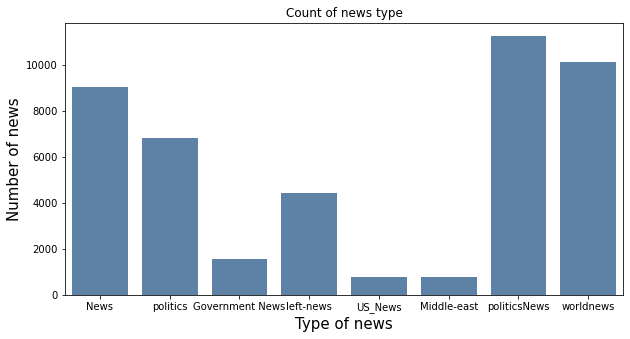

In [14]:
# Visualization of News Types
ax = sns.countplot(x="subject", data=clean_dataset,facecolor=(.1, .3, .5, .7),linewidth=5)
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
plt.show()

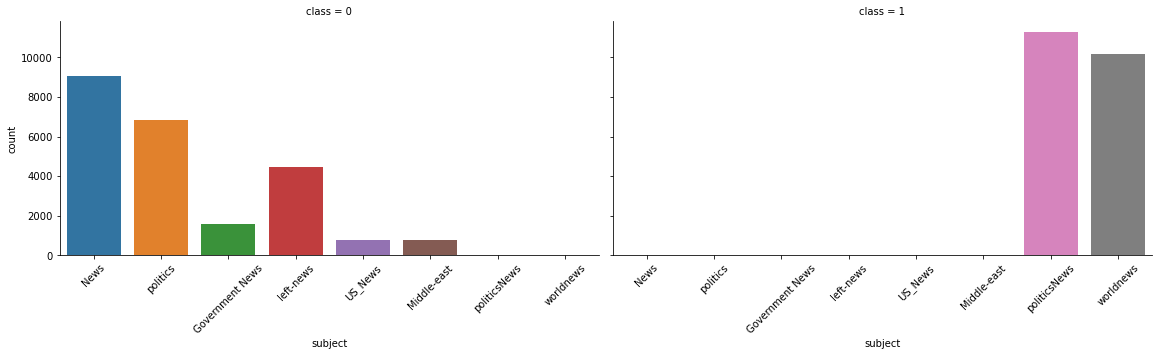

In [15]:
# Count of news subject based on true or fake
g = sns.catplot(x="subject", col="class",data=clean_dataset, kind="count", height=4, aspect=2)
g.set_xticklabels(rotation=45)
plt.show()

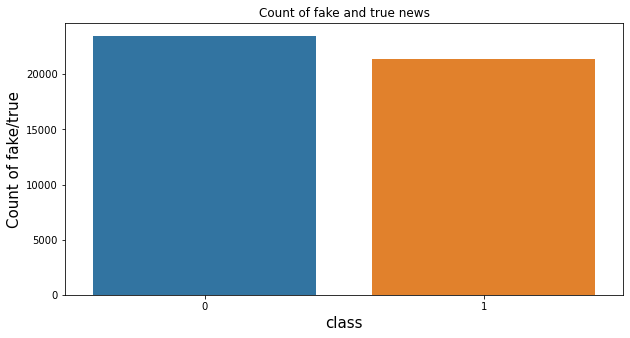

In [16]:
# Count of fake and true news 
ax=sns.countplot(x="class", data=clean_dataset)
ax.set(xlabel='class', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
plt.show()

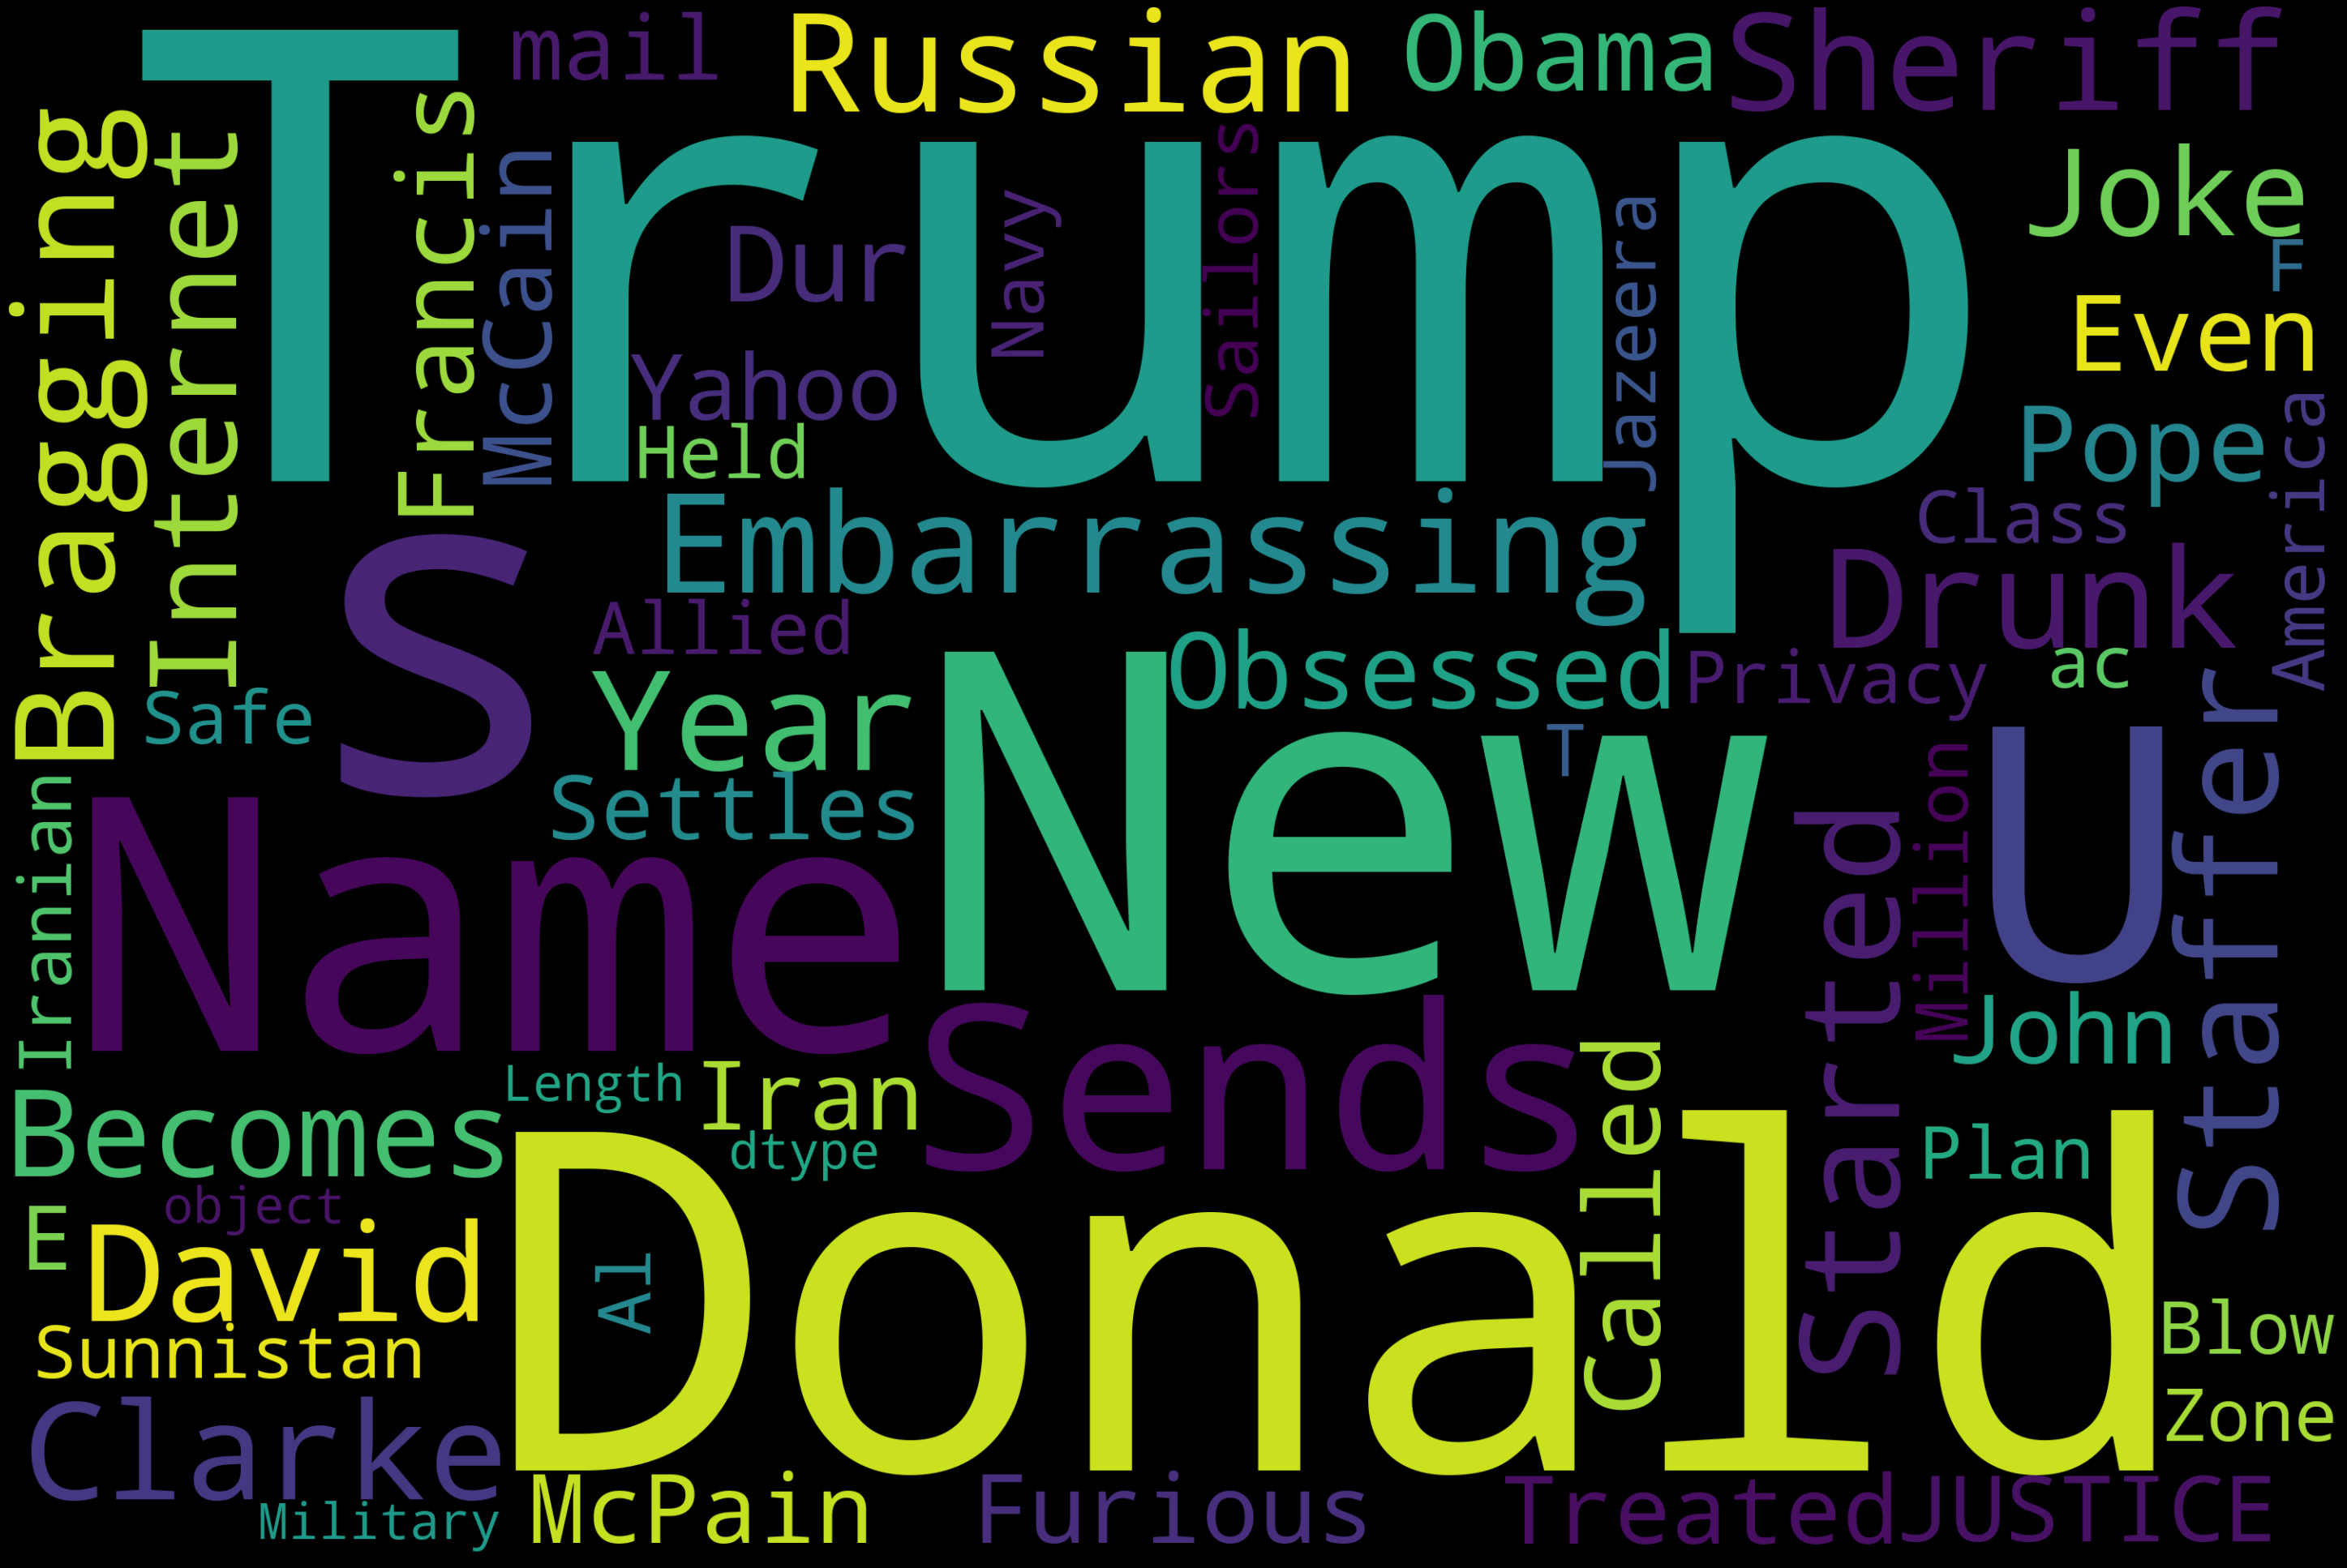

In [17]:
# WordCloud of Fake News
text = fake_n["news"]
wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (40, 30),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

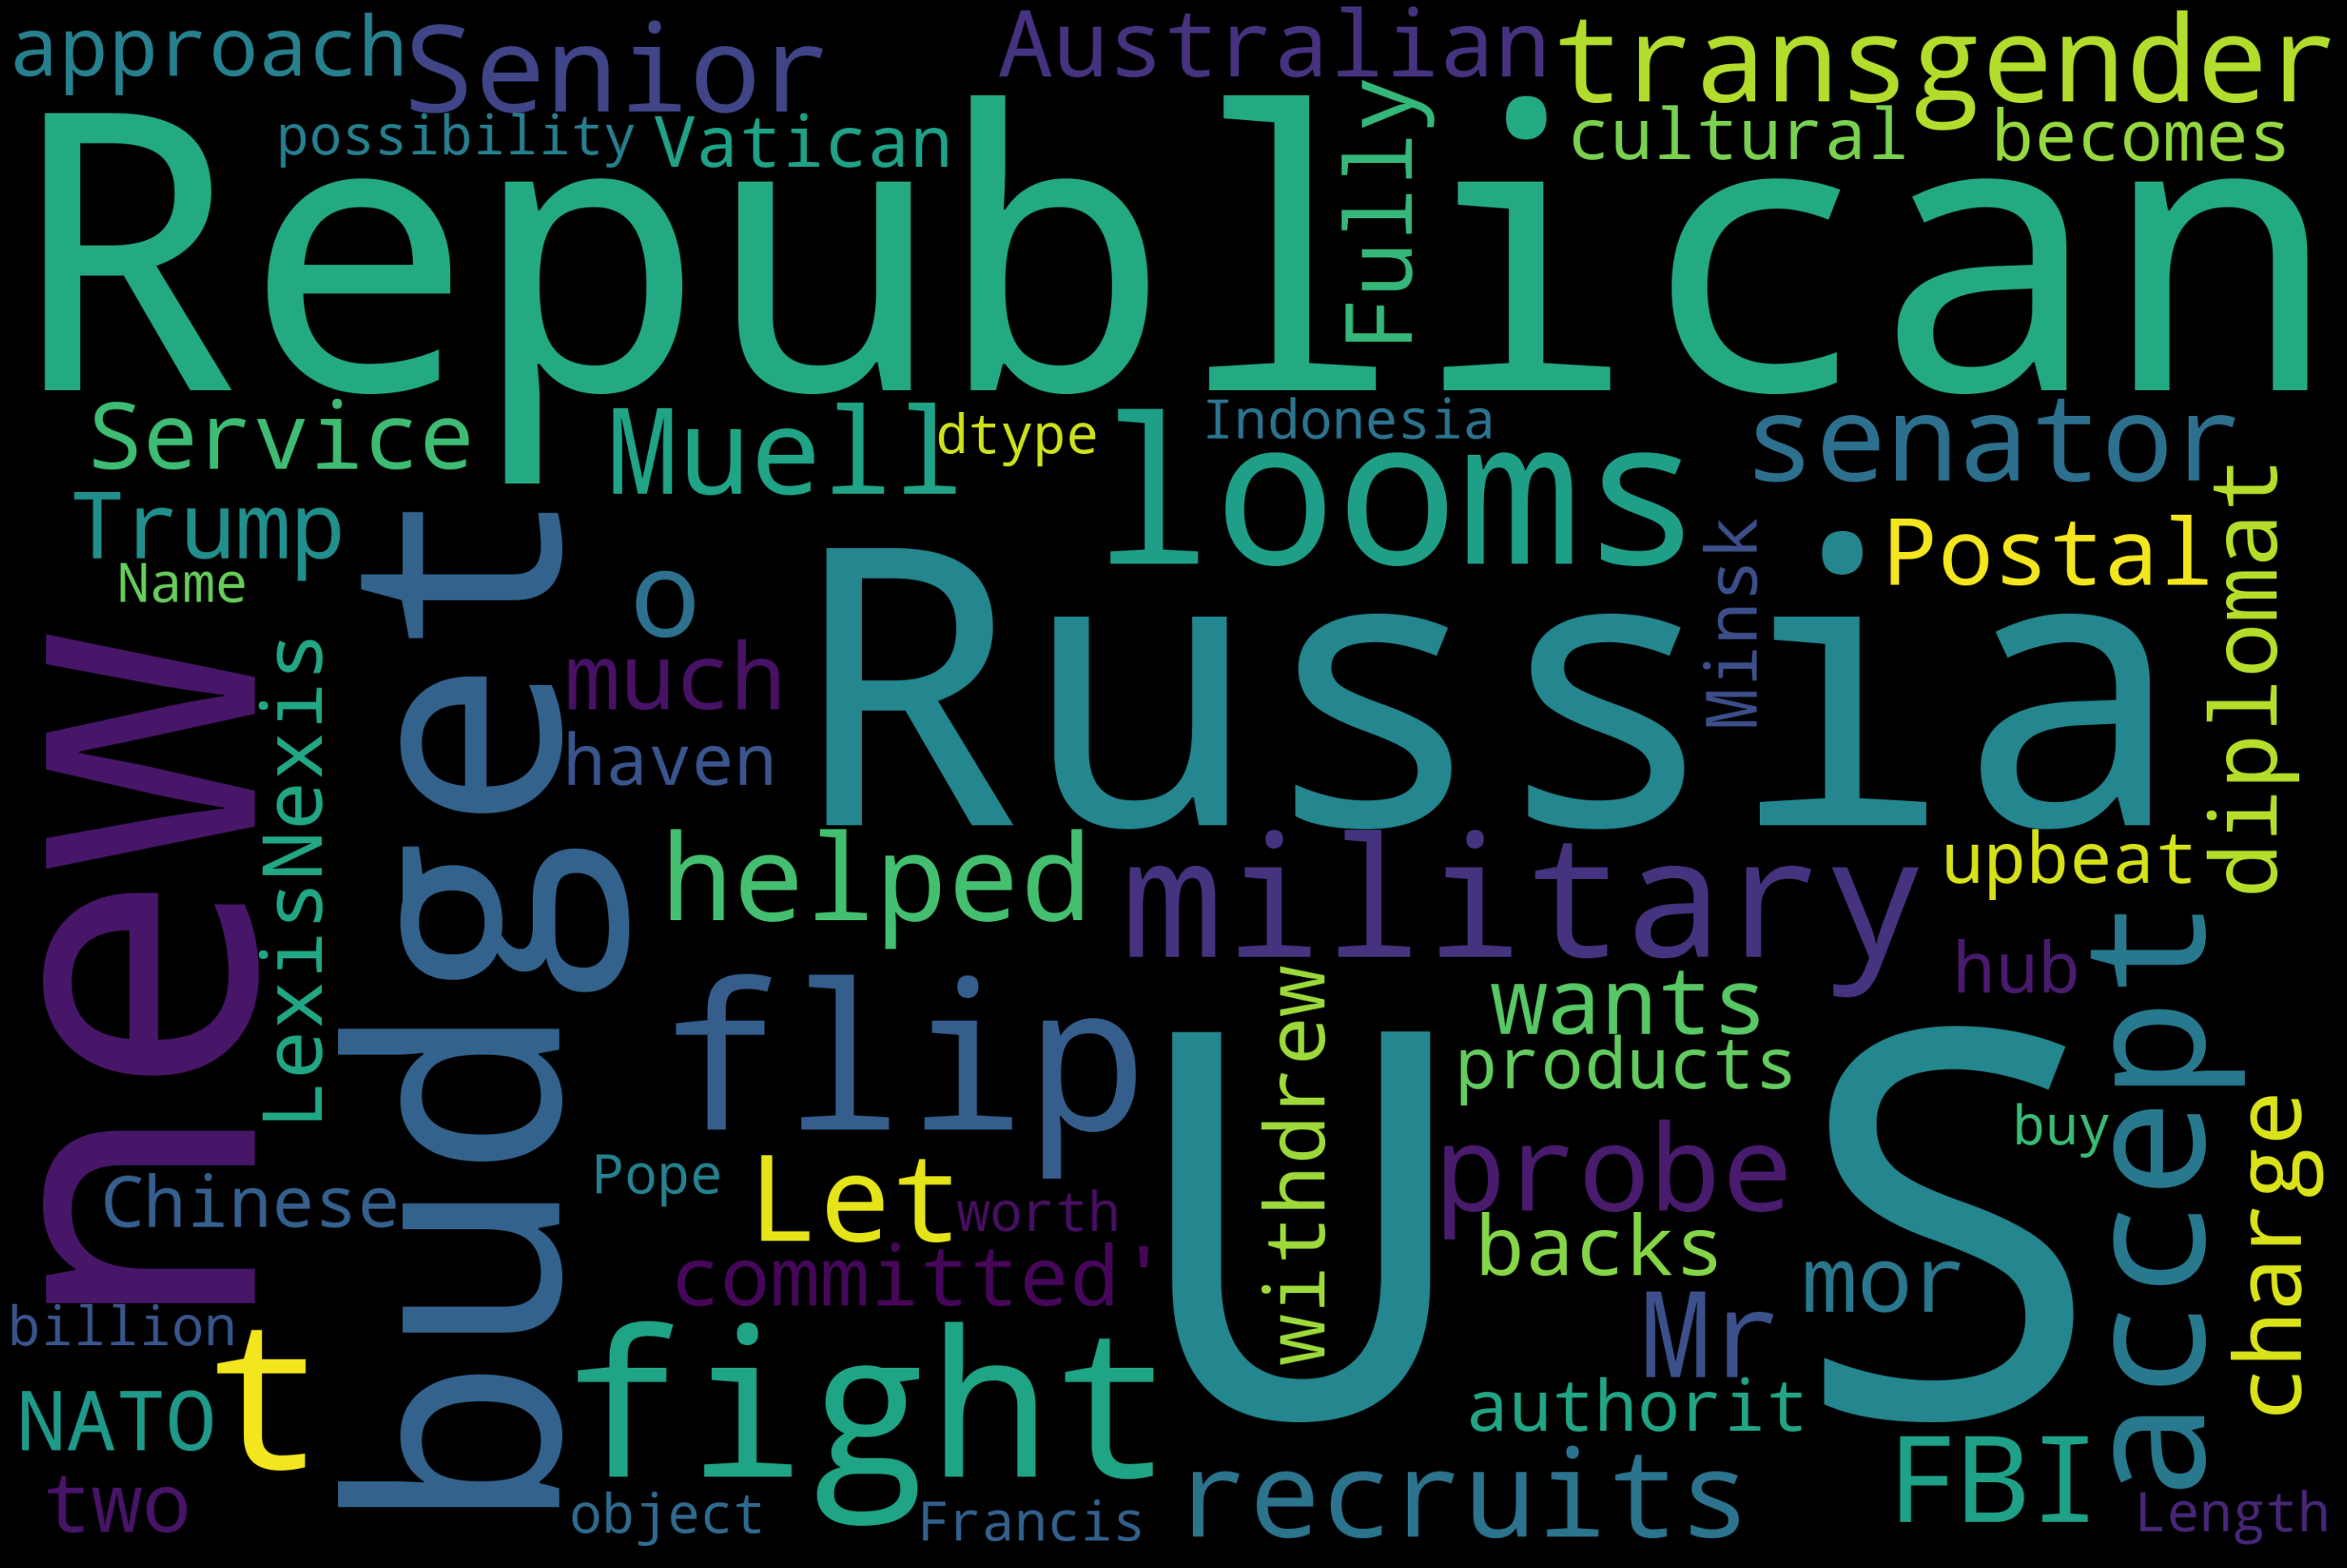

In [18]:
# WordCloud of True News
text = true_n["news"]
wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (40, 30),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Model Section

In [19]:
import sklearn 
from nltk.stem.porter import PorterStemmer
!pip install textblob
from textblob import TextBlob
! pip install plotly --upgrade
import plotly.graph_objs as go
!pip install cufflinks
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

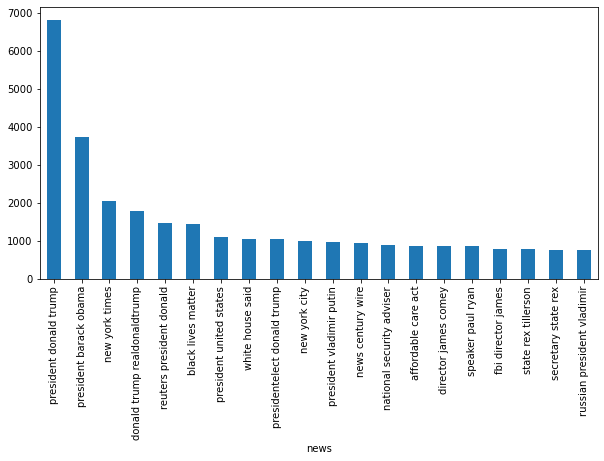

In [20]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(clean_dataset['news'], 20)
#for word, freq in common_words:
#    print(word, freq)

df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])
df3.groupby('news').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [21]:
# Term Frequency — Inverse Document Frequency

news_features=clean_dataset.copy()
news_features=news_features[['news']].reset_index(drop=True)
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(3,3))
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape
new_array=X.toarray()
for counter, doc in enumerate(new_array):
	tf_idf_tuples = list(zip(tfidf_vectorizer.get_feature_names(), doc))
	one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

Original dataset shape : Counter({0: 23471, 1: 21417})
0.9359174277864409

 Classification Report: Logistic Regression 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7033
           1       0.95      0.91      0.93      6434

    accuracy                           0.94     13467
   macro avg       0.94      0.93      0.94     13467
weighted avg       0.94      0.94      0.94     13467

Confusion matrix, without normalization


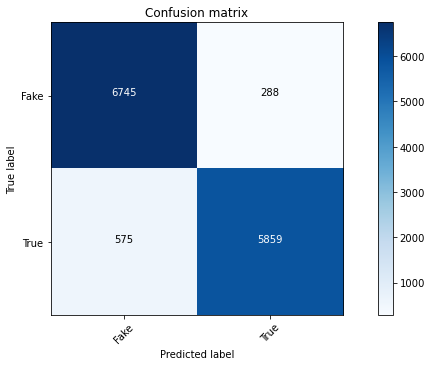

In [23]:
# Classifying using Logistic Regression
y=clean_dataset['class']
print(f'Original dataset shape : {Counter(y)}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print("\n Classification Report: Logistic Regression \n",classification_report(y_test, y_pred_lr))
cmlr=metrics.confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cmlr, classes=['Fake','True'])

Original dataset shape : Counter({0: 23471, 1: 21417})
0.726665181554912

 Classification Report: KNN
               precision    recall  f1-score   support

           0       0.66      0.96      0.79      7033
           1       0.92      0.47      0.62      6434

    accuracy                           0.73     13467
   macro avg       0.79      0.72      0.70     13467
weighted avg       0.79      0.73      0.71     13467

Confusion matrix, without normalization


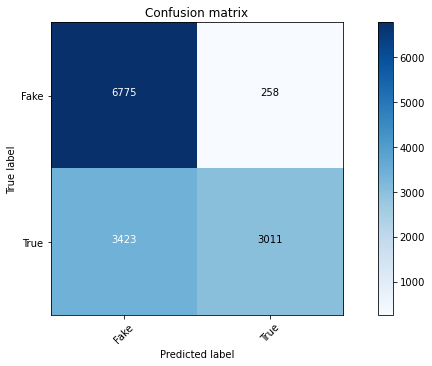

In [24]:
# Classifying using KNN
y=clean_dataset['class']
print(f'Original dataset shape : {Counter(y)}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
KN=KNeighborsClassifier()
KN.fit(X_train, y_train)
y_pred_kn = KN.predict(X_test)
print(accuracy_score(y_test, y_pred_kn))
print("\n Classification Report: KNN\n",classification_report(y_test, y_pred_kn))
cmkn=metrics.confusion_matrix(y_test, y_pred_kn)
plot_confusion_matrix(cmkn, classes=['Fake','True'])